<a href="https://colab.research.google.com/github/chunyulin/tf2020ncku/blob/master/1_LoadModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load models from Google drive (Or, from your own storage server.)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
GD_PATH="/content/drive/'My Drive'/Colab_shared"
!cp -r {GD_PATH}/mnist_v0 ./model/
!ls

drive  model  sample_data


# Load the model

In [0]:
# Load data

import tensorflow as tf
import numpy as np

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0    ## normalization

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

## let's have a look on the data
import matplotlib.pyplot as plt

ID=3
plt.imshow(x_test[3,...,0])
plt.title("MNIST: %d" % y_test[3])
plt.show()

In [0]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(32).prefetch(tf.data.experimental.AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

Model: "my_model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            multiple                  320       
_________________________________________________________________
flatten_5 (Flatten)          multiple                  0         
_________________________________________________________________
dense_10 (Dense)             multiple                  2769024   
_________________________________________________________________
predict (Dense)              multiple                  1290      
Total params: 2,770,634
Trainable params: 2,770,634
Non-trainable params: 0
_________________________________________________________________


Using TensorFlow backend.


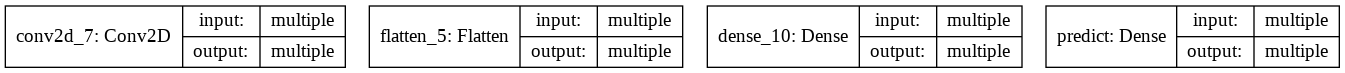

In [9]:
# Load saved model
MODEL_PATH="model/mnist_v0"
model_load = tf.keras.models.load_model(MODEL_PATH)

model_load.summary()

from keras.utils.vis_utils import plot_model
plot_model(model_load, show_shapes=True, to_file='model.png')


In [11]:
layer = model_load.get_layer('dense_10')
print(layer.get_config())        ## layer information
print(len(layer.get_weights()))

layer = model_load.get_layer('conv2d_7')
print(layer.get_config())        ## layer information
print(len(layer.get_weights()))


{'name': 'dense_10', 'trainable': True, 'dtype': 'float32', 'units': 128, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
2
{'name': 'conv2d_7', 'trainable': True, 'dtype': 'float32', 'filters': 32, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
2


In [0]:
images = x_test[0:20]   # (10,28,28,1)
labels = y_test[0:20]
pre = model_load.predict(images).argmax(axis=-1)
print( pre)
print( labels)
print( pre-labels)

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Predict:  [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
